In [27]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /Users/jody/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jody/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 자카드 유사도

In [28]:
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()
    
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
    
    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))
    
    return inter/union

In [29]:
d1 = 'Think like a man of action and act like man of thought.'
d2 = 'Try no to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, of give me death'

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d2,d3))
print(jaccard_similarity(d1,d3))

0.2222222222222222
0.058823529411764705
0.06666666666666667


## 코사인 유사도

In [30]:
tiv = TfidfVectorizer()
corpus = [d1,d2,d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 데이터 전처리

In [31]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [32]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [33]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec

In [34]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [35]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [36]:
word2vec.most_similar('영화')

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_18973/3796414763.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word2vec.most_similar('영화')


[('듯', 0.9650177359580994),
 ('작품', 0.9630680084228516),
 ('마음', 0.9571877121925354),
 ('이야기', 0.9568941593170166),
 ('따뜻', 0.9529138803482056),
 ('에게', 0.9482348561286926),
 ('모습', 0.9477578997612),
 ('현실', 0.9466150403022766),
 ('삶', 0.944279670715332),
 ('모든', 0.9441778659820557)]

In [37]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [38]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_18973/304006666.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  similarity = word2vec[vocab]


array([[ 1.6738093e-01, -3.8911898e-02,  2.9339084e-02, ...,
        -2.3948444e-01, -1.4278588e-01, -6.5296471e-02],
       [ 5.0100845e-01, -3.8148233e-01,  3.5029575e-03, ...,
        -6.8976671e-01, -4.6192688e-01, -2.2685991e-01],
       [-2.3836942e-02, -4.2353472e-01,  3.3629280e-02, ...,
        -1.1290343e+00, -7.4505156e-01, -5.9427696e-01],
       ...,
       [ 3.2567762e-02, -4.3672314e-03,  7.2136950e-03, ...,
        -2.6914535e-02, -2.8910836e-02, -3.5258378e-03],
       [ 5.0632283e-02, -1.8788520e-02, -5.7280036e-03, ...,
        -2.4372905e-02, -2.7225431e-02,  4.2195100e-04],
       [ 5.2039210e-02, -6.5373559e-03, -1.2924625e-04, ...,
        -4.0214162e-02, -3.5179965e-02, -1.1890569e-03]], dtype=float32)

In [39]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index = vocab, columns=['x', 'y'])
df[0:10]

,x,y
어릴,25.726852,-1.481216
때,17.814581,53.407211
보,13.687671,56.040318
고,15.157684,56.740700
지금,16.956511,55.174911
다시,15.671105,56.028816
봐도,17.858055,56.302475
재밌,28.577211,56.629971
어요,28.696394,54.795460
ㅋㅋ,31.573517,54.395725


/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


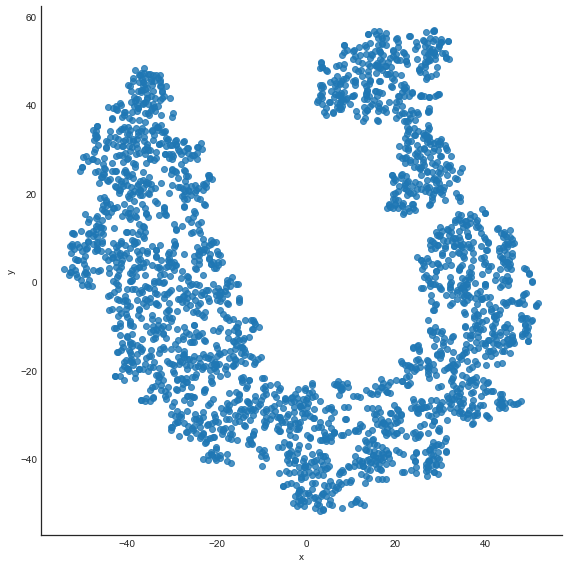

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

### 계층적 군집화 - 병합 군집화

### ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두개를 합침

In [41]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([1, 2, 2, ..., 4, 4, 4])

In [42]:
results = df
results['predict'] = predict
results[1:10]

,x,y,predict
때,17.814581,53.407211,2
보,13.687671,56.040318,2
고,15.157684,56.740700,2
지금,16.956511,55.174911,2
다시,15.671105,56.028816,2
봐도,17.858055,56.302475,2
재밌,28.577211,56.629971,2
어요,28.696394,54.795460,2
ㅋㅋ,31.573517,54.395725,2


/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


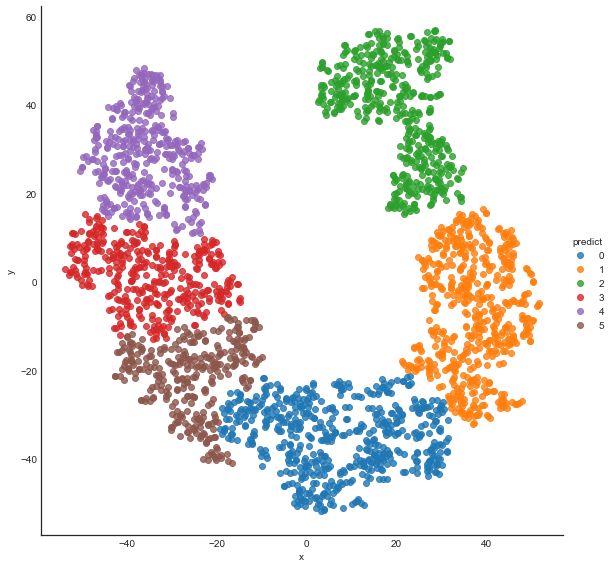

In [43]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue = 'predict')
plt.show()

### average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침

In [44]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([0, 2, 2, ..., 5, 5, 5])

In [45]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.726852,-1.481216,0
때,17.814581,53.407211,2
보,13.687671,56.040318,2
고,15.157684,56.740700,2
지금,16.956511,55.174911,2
다시,15.671105,56.028816,2
봐도,17.858055,56.302475,2
재밌,28.577211,56.629971,2
어요,28.696394,54.795460,2
ㅋㅋ,31.573517,54.395725,2


/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


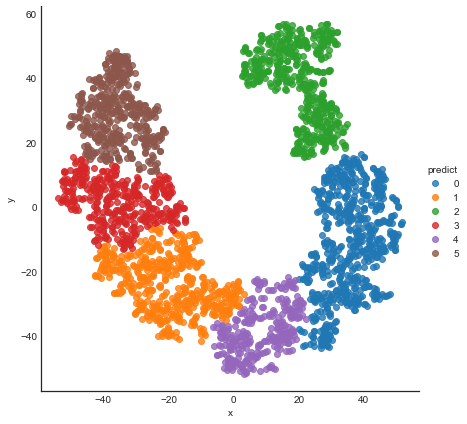

In [47]:
sns.lmplot('x', 'y', data=results, fit_reg= False, size=6, hue='predict')
plt.show()

### complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

In [48]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([2, 1, 1, ..., 5, 5, 5])

In [49]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.726852,-1.481216,2
때,17.814581,53.407211,1
보,13.687671,56.040318,1
고,15.157684,56.740700,1
지금,16.956511,55.174911,1
다시,15.671105,56.028816,1
봐도,17.858055,56.302475,1
재밌,28.577211,56.629971,1
어요,28.696394,54.795460,1
ㅋㅋ,31.573517,54.395725,1


/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


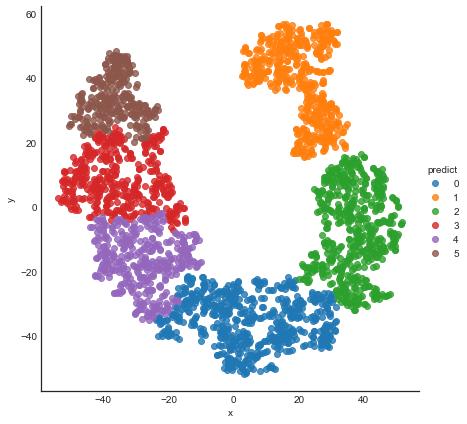

In [50]:
sns.lmplot('x', 'y', data=results, fit_reg= False, size=6, hue='predict')
plt.show()

### 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

In [53]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,55.464795,58.776430,59.181913,57.339652,58.391111,58.325577,58.189643,56.363840,56.190890,51.200303,44.259365,51.014064,38.603544,45.904119,47.257680,57.599018,44.564737,48.871834,48.509479,50.848797,79.533127,32.000619,40.960623,56.017924,50.279623,30.821374,56.560756,51.516197,27.488226,47.322679,33.491268,46.759847,52.988661,58.592894,34.720207,46.861290,50.960146,50.479025,25.289620,...,68.810633,50.497748,53.312763,74.510322,59.402327,69.825851,42.701459,53.659486,60.754592,78.755213,56.801617,56.443244,47.741557,75.955475,64.084655,73.806956,66.506800,78.922946,72.173924,53.469445,74.275825,59.937128,49.430187,18.879296,56.171251,67.766419,74.786475,63.695585,63.171839,64.280237,50.570204,72.452898,35.211902,74.304035,68.833930,72.983374,67.798415,76.413671,79.288949,75.729395
1,55.464795,0.000000,4.895369,4.262774,1.964955,3.386340,2.895590,11.234785,10.970009,13.794400,17.136184,19.346161,16.906771,93.983019,19.525034,19.413893,83.722421,19.069846,18.452471,18.514884,13.948044,69.196255,85.153065,94.689635,9.443452,13.971623,84.000361,9.885663,5.756217,30.190345,15.261935,24.399706,17.956963,2.813510,95.753942,21.932676,18.069878,4.568784,5.005143,72.102496,...,70.481212,65.974056,57.029121,69.454087,48.152356,62.200373,75.614737,68.467128,78.386269,58.039825,74.535138,55.018074,58.823261,52.658712,69.124947,57.878169,58.073243,54.585531,51.068887,54.123357,62.296480,55.471018,61.413361,74.098235,78.014443,68.953776,54.742663,67.870406,74.453626,75.345789,73.479716,53.765161,87.071334,60.463718,75.563688,51.235471,59.904167,53.120430,60.869294,61.753166
2,58.776430,4.895369,0.000000,1.628335,3.381456,1.983468,4.178616,14.901212,15.060260,17.961297,15.617141,19.519887,15.456893,97.172657,19.229225,18.774482,83.653734,19.200482,17.474597,17.629241,12.854308,66.318798,88.995418,97.340311,6.685894,13.079529,87.834070,13.912606,10.642368,34.353157,15.191871,28.754558,17.623216,7.582066,96.455684,26.116363,17.691926,8.262621,9.161464,76.300504,...,68.617850,65.518924,55.893440,67.027722,46.001350,59.768779,76.361677,67.853515,77.705395,54.560711,73.975301,53.483775,58.297843,49.107953,67.606807,54.830748,55.719688,50.886895,47.776021,52.845196,59.466227,53.617821,60.841498,77.545736,77.715391,67.094636,51.421383,66.316605,73.324375,74.171157,73.412262,50.602934,89.476090,57.523010,74.000660,47.875497,57.530403,49.555757,57.512597,58.760956
3,59.181913,4.262774,1.628335,0.000000,2.384841,0.877713,2.735698,13.419984,13.677742,16.582475,17.135078,20.772174,16.965076,97.640757,20.572086,20.176030,85.025285,20.459958,18.924770,19.065748,14.293428,67.942855,89.160887,98.014108,8.276764,14.487373,88.003859,12.522554,9.944705,34.322010,16.465334,28.598223,18.964681,7.074373,97.677380,26.064413,19.041935,8.312571,9.038122,76.261183,...,70.213690,66.950092,57.415707,68.649318,47.606375,61.389410,77.567397,69.309852,79.173884,56.152170,75.425482,55.048406,59.736916,50.692194,69.173814,56.449672,57.337039,52.453060,49.382306,54.382805,61.090417,55.206817,62.288866,77.898963,79.124782,68.689929,53.025921,67.886667,74.851223,75.703496,74.780411,52.216804,90.232382,59.145188,75.573066,49.477073,59.148846,51.138478,59.114613,60.381910
4,57.339652,1.964955,3.381456,2.384841,0.000000,1.543185,1.443670,11.711442,11.746014,14.637760,17.434690,20.294965,17.230467,95.844128,20.308760,20.070859,84.694462,20.001615,18.974162,19.072203,14.373927,69.013287,87.100455,96.446236,9.093708,14.475073,85.946931,10.608666,7.562364,32.153477,16.086604,26.363691,18.714295,4.761062,96.985204,23.895336,18.812113,6.383986,6.933887,74.067228,...,70.758715,66.800418,57.592863,69.482829,48.286099,62.222334,76.852952,69.237123,79.136180,57.543923,

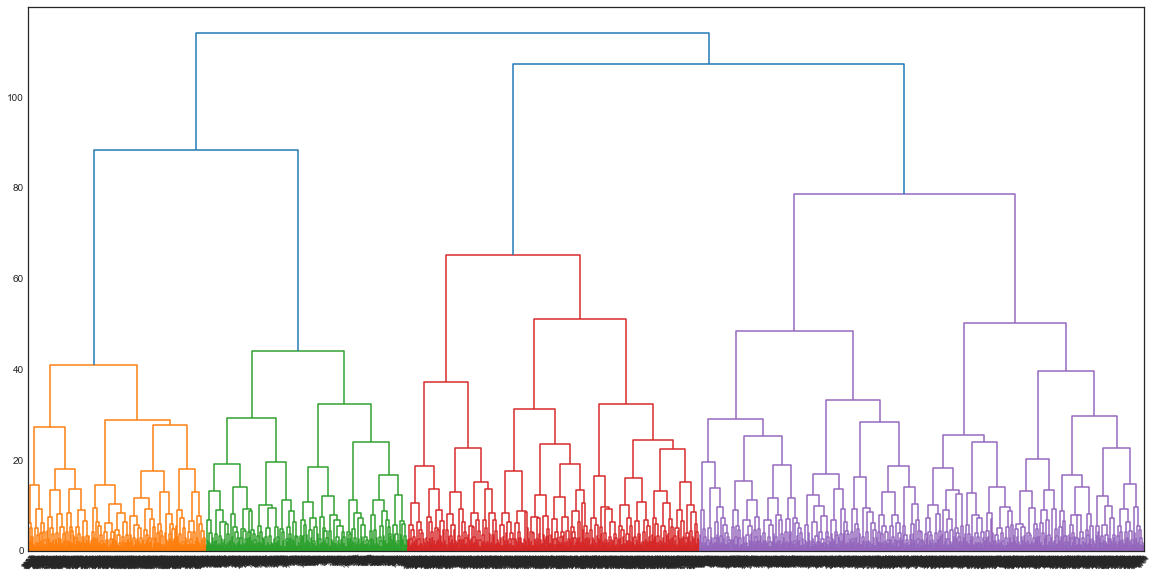

In [54]:
row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
          leaf_rotation=50,
          leaf_font_size=7)

plt.show()

### word2vec을 이용한 덴드로그램 시각화

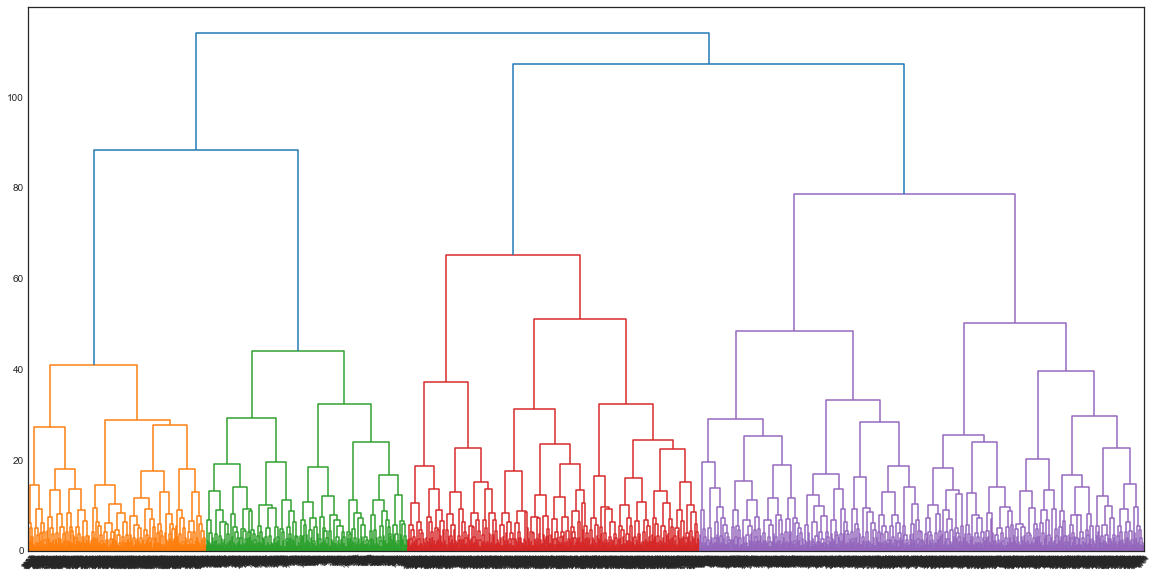

In [55]:
mergings = linkage(df, method='complete')

plt.figure(figsize = (20,10))
dendrogram(mergings,
          leaf_rotation=50,
          leaf_font_size=7)
plt.show()

### kemans 비계층적 군집화 (대량의 데이터 사용할때 좋음)

#### 클러스터 개수 3

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [57]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.726852,-1.481216,1
때,17.814581,53.407211,1
보,13.687671,56.040318,1
고,15.157684,56.740700,1
지금,16.956511,55.174911,1
다시,15.671105,56.028816,1
봐도,17.858055,56.302475,1
재밌,28.577211,56.629971,1
어요,28.696394,54.795460,1
ㅋㅋ,31.573517,54.395725,1


/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


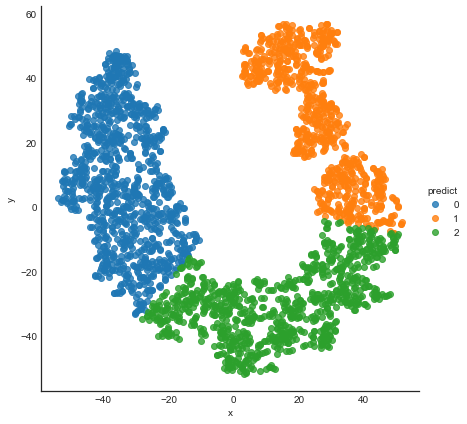

In [60]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

#### 클러스터 개수 6

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([3, 5, 5, ..., 1, 1, 1], dtype=int32)

In [62]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.726852,-1.481216,3
때,17.814581,53.407211,5
보,13.687671,56.040318,5
고,15.157684,56.740700,5
지금,16.956511,55.174911,5
다시,15.671105,56.028816,5
봐도,17.858055,56.302475,5
재밌,28.577211,56.629971,5
어요,28.696394,54.795460,5
ㅋㅋ,31.573517,54.395725,5


/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


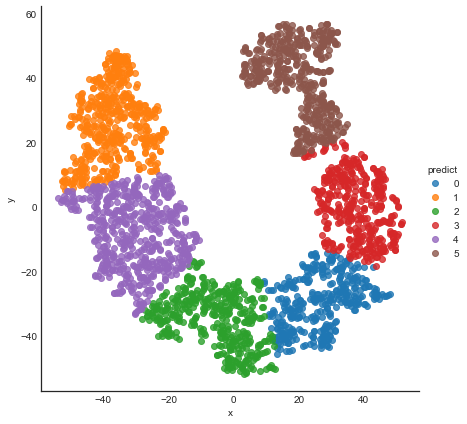

In [63]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()